## Observations and Insights

1. The weight is positive correlate to tumor size, mice who are heavier has more propability to have larger tumer size 
2. The long the treatment the smaller size the tumor size will be 
3. Capomulin is the most effctive drug among the drugs.

## Dependencies and starter code

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset
dataset = pd.merge(mouse_metadata,study_results, on = 'Mouse ID', how = 'left' )
dataset.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


## Summary statistics

In [3]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
group_regimen =  dataset.groupby('Drug Regimen')
group_regimen.count()

means =group_regimen['Tumor Volume (mm3)'].mean()
medians = group_regimen['Tumor Volume (mm3)'].median()
variances = group_regimen['Tumor Volume (mm3)'].var()
SDs = group_regimen['Tumor Volume (mm3)'].std()
SEMs = group_regimen['Tumor Volume (mm3)'].sem()

# Create a summary table 
summary = pd.DataFrame({'Tumor Volume Mean':means,
                        'Tumor Volume Median':medians,
                        'Tumor Volume Variance':variances,
                        'Tumor Volume Std.Dev.':SDs,
                        'Tumor Volume SEM':SEMs,
                       })
summary

,Tumor Volume Mean,Tumor Volume Median,Tumor Volume Variance,Tumor Volume Std.Dev.,Tumor Volume SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar plots

Text(0, 0.5, 'Data Points')

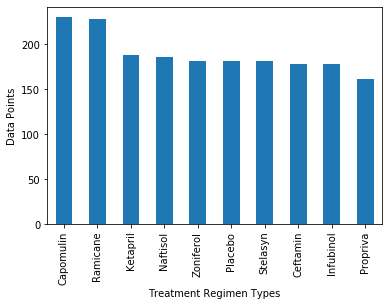

In [4]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas
data_point = dataset['Drug Regimen'].value_counts()
data_point.plot(kind = 'bar')
plt.xlabel('Treatment Regimen Types')
plt.ylabel('Data Points')

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

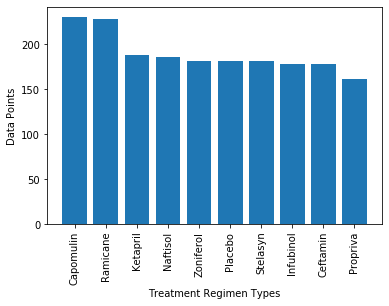

In [5]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot
data_point = dataset['Drug Regimen'].value_counts()
x_axis = np.arange(len(data_point))
plt.bar(x_axis, data_point)

plt.xlabel('Treatment Regimen Types')
plt.ylabel('Data Points')

tick_location = [value for value in x_axis]
plt.xticks(tick_location, ['Capomulin','Ramicane','Ketapril','Naftisol','Zoniferol','Placebo','Stelasyn','Infubinol','Ceftamin','Propriva'])
plt.xticks(rotation = 90)

## Pie plots

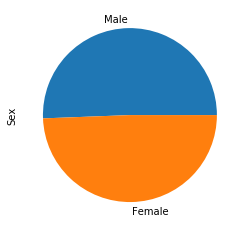

In [6]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
size =  dataset['Sex'].value_counts()
size.plot(kind = 'pie')

Text(0, 0.5, 'Sex')

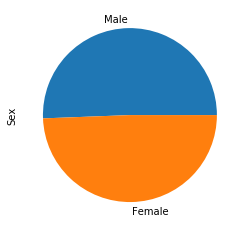

In [7]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
# Labels
lables = ['Female','Male']

# Sizes
size =  dataset['Sex'].value_counts()
plt.pie(size.values,labels = size.index.values)
plt.ylabel('Sex')

## Quartiles, outliers and boxplots

In [8]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. 

# infor need to retrieve : Mouse Id, tumor volume
mouse_id = dataset.groupby('Mouse ID').count()
dataset.set_index('Mouse ID')
mouse_id.head()

# The most promising treatment regimens : Capomulin, Ramicane, Infubinol, and Ceftamin
Capomulin = dataset.loc[dataset['Drug Regimen']=='Capomulin']['Tumor Volume (mm3)']
Ramicane = dataset.loc[dataset['Drug Regimen']=='Ramicane']['Tumor Volume (mm3)']
Infubinol = dataset.loc[dataset['Drug Regimen']=='Infubinol']['Tumor Volume (mm3)']
Ceftamin = dataset.loc[dataset['Drug Regimen']=='Ceftamin']['Tumor Volume (mm3)']


In [9]:
# Calculate the IQR and quantitatively determine if there are any potential outliers. 

# Capomulin
quartile_cap = Capomulin.quantile([0.25, 0.5, 0.75])
lowerq_cap = quartile_cap[0.25]
upperq_cap = quartile_cap[0.75]
iqr_cap = upperq_cap - lowerq_cap
lower_bound_cap = lowerq_cap - (1.5*iqr_cap)
upper_bound_cap = upperq_cap + (1.5*iqr_cap)

# Ramicane
quartile_ram = Ramicane.quantile([0.25,0.5,0.75])
lowerq_ram = quartile_ram[0.25]
upperq_ram = quartile_ram[0.75]
iqr_ram = upperq_ram - lowerq_ram
lower_bound_ram = lowerq_ram - (1.5*iqr_ram)
upper_bound_ram = upperq_ram + (1.5*iqr_ram)

# Infubinol
quartile_inf = Infubinol.quantile([0.25, 0.5, 0.75])
lowerq_inf = quartile_inf[0.25]
upperq_inf = quartile_inf[0.75]
iqr_inf = upperq_inf - lowerq_inf
lower_bound_inf = lowerq_inf - (1.5*iqr_inf)
upper_bound_inf = upperq_inf + (1.5*iqr_inf)

# Ceftamin
quartile_cef = Ceftamin.quantile([0.25, 0.5, 0.75])
lowerq_cef = quartile_cef[0.25]
upperq_cef = quartile_cef[0.75]
iqr_cef = upperq_cef - lowerq_cef
lower_bound_cef = lowerq_cef - (1.5*iqr_cef)
upper_bound_cef = upperq_cef + (1.5*iqr_cef)

In [10]:
# Detemine whether there are outliers 

# Capomulin
outlier_cam = Capomulin.loc[(Capomulin < lower_bound_cap)|(Capomulin > upperq_cap)]
print(f"Capomulin outlier : {outlier_cam}")

# Ramicane
outlier_ram = Ramicane.loc[(Ramicane < lower_bound_ram)|(Ramicane > upperq_ram)]
print(f"Ramicane outlier : {outlier_ram}")

# Infubinol
outlier_inf = Infubinol.loc[(Infubinol < lower_bound_inf)| (Infubinol > upper_bound_inf)]
print(f"Infubinol outlier : {outlier_inf}")

# Ceftamin
outlier_cef = Ceftamin.loc[(Ceftamin < lower_bound_cef) | (Ceftamin > upper_bound_cef)]
print(f"Ceftamin outlier : {outlier_cef}")

Capomulin outlier : 18      25.472143
19      23.343598
21      45.473753
96      45.760886
97      46.568417
98      47.212200
126     45.781746
136     45.622381
137     46.414518
156     45.895647
157     46.749006
196     45.595685
216     45.893720
236     45.839400
237     46.304003
274     45.462243
275     46.154737
278     45.354679
301     45.651331
311     45.641438
312     46.408361
329     45.838998
330     46.425366
331     47.322984
332     48.158209
342     45.704434
354     45.216743
355     45.933322
356     46.809225
359     45.565821
372     45.851193
373     46.759074
374     47.488599
375     48.070452
382     45.737145
383     46.544292
384     47.373423
437     45.261384
438     45.941949
439     46.821070
440     47.685963
1453    45.597064
1454    46.059608
1455    46.539206
Name: Tumor Volume (mm3), dtype: float64
Ramicane outlier : 9      22.050126
41     45.851531
88     45.252534
106    45.521875
146    45.578678
147    46.287992
148    46.940945
166    45

Text(0, 0.5, 'Final Tumor volume')

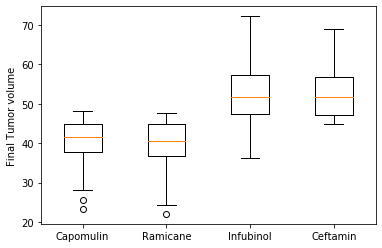

In [11]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
%matplotlib inline
plt.boxplot([Capomulin, Ramicane, Infubinol, Ceftamin],labels =['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'] )
plt.ylabel('Final Tumor volume')

## Line and scatter plots

Text(0, 0.5, 'Tumor Volume (mm3)')

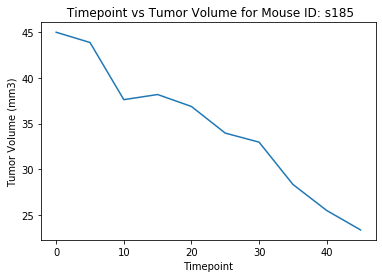

In [12]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
Capomulin_data = dataset.loc[dataset['Drug Regimen']=='Capomulin']
mouse_select = Capomulin_data.loc[Capomulin_data['Mouse ID'] == 's185']
plt.plot(mouse_select['Timepoint'], mouse_select['Tumor Volume (mm3)'])
plt.title(" Timepoint vs Tumor Volume for Mouse ID: s185")
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume (mm3)')

Text(0, 0.5, 'Average Tumor Volume(mm3)')

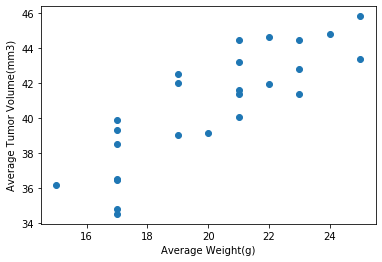

In [13]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
Capomulin_data = dataset.loc[dataset['Drug Regimen']=='Capomulin']
groupby_mouseID = Capomulin_data.groupby('Mouse ID')
ave_weight = groupby_mouseID ['Weight (g)'].mean()
ave_tumor = groupby_mouseID['Tumor Volume (mm3)'].mean()

# Scatter plot 
plt.scatter(ave_weight, ave_tumor)
plt.xlabel('Average Weight(g)')
plt.ylabel('Average Tumor Volume(mm3)')

In [14]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen

# Correlation Coefficient 
correlation = st.pearsonr(ave_weight,ave_tumor)

Text(0, 0.5, 'Average Tumor Volume(mm3)')

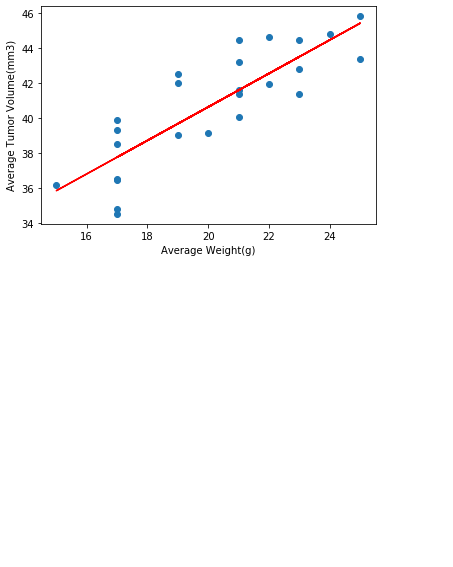

In [18]:
# Linear regression
from scipy.stats import linregress
(slope, intercept, rvalue, pvalue, stderr) = linregress(ave_weight,ave_tumor)
regress_values = ave_weight*slope + intercept

line_eq = 'y =' + str(slope) + 'x + ' + str(intercept)
plt.annotate(line_eq, (15,15), fontsize = 15, color = 'red')

plt.scatter(ave_weight,ave_tumor)
plt.plot(ave_weight,regress_values, color = 'r')
plt.xlabel('Average Weight(g)')
plt.ylabel('Average Tumor Volume(mm3)')